## Problem

$ \displaystyle \max_{\{X_{ij}\}} f_i := C_i\sum_{j=1}^{27}P_{ij}X_{ij} - d_i\sum_{j=1}^{27}X_{ij}$,    $\forall i = 1, 2, \cdots, 9$ dan $\forall j=1,2, \cdots 27 $<br><br><br>
terhadap: <br><br>
$\displaystyle \sum_{i=1}^9X_{ij}\leq Y_{j}$, $\forall j = 1, 2, ..., 27$<br><br>
$\sum_{j=1}^{27}X_{ij}\leq Q_{i}$, $\displaystyle \forall i = 1, 2, ..., 9$<br>

In [36]:
import csv
import random
import math
import operator
from matplotlib import pyplot as plt
from tabulate import tabulate
import sys
import numpy as np

## 1. Import data dari csv

In [37]:
produksi_komoditas = []
with open('produksi_komoditas.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    produksi_komoditas = [[float(i)/1000000 for i in row] for row in csv_reader]
print(produksi_komoditas)

[[17.5402, 7.3859, 0.1006, 1.3829, 0.875, 18.0482, 0.1666, 51.2802, 1.0966, 0.0836, 2.816, 7.508, 0.1809, 5.3842, 3.6982, 8.855, 3.4732, 3.9889, 0.0046, 0.176, 0.024, 0.693, 0.0765, 0.0, 0.0, 0.0, 0.0712], [40.5328, 7.7092, 0.0447, 3.6862, 3.6004, 44.3943, 5.5499, 102.3851, 2.3912, 0.003, 1.3085, 12.4517, 0.0818, 4.6822, 7.4525, 11.9556, 5.1174, 20.0268, 0.0012, 0.071, 0.0173, 0.325, 0.003, 0.0, 0.0, 0.2005, 0.3199], [46.83, 0.0745, 0.005, 0.045, 0.0, 0.133, 38.374, 35.3849, 2.8966, 0.0002, 3.5828, 37.7053, 0.008, 0.0, 0.2575, 1.169, 0.328, 0.0264, 0.0, 0.0, 0.0, 0.0, 0.0, 0.045, 0.0, 0.0, 0.0], [95.6893, 3.5798, 0.0, 0.3294, 0.2651, 13.1111, 0.0, 157.9022, 0.0, 0.0, 2.5443, 3.2526, 0.0, 0.0338, 0.4973, 6.4234, 6.8211, 1.0904, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [54.3202, 0.7125, 0.0, 2.6734, 0.0, 42.9981, 0.0, 42.9503, 0.0, 0.0, 0.5949, 0.3045, 0.0, 0.0, 0.0, 2.9538, 0.045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [64.3271, 8.1327, 0.0, 4.0816, 0.8758, 31.5514, 0

In [38]:
harga_jual = []
with open('harga_jual.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        harga_jual.append(float(row[0])/10000)
print(harga_jual)

[4.0, 4.5, 1.6125, 0.3356, 0.525, 0.325, 0.5243, 0.5, 0.8067]


In [39]:
penggunaan_pupuk = []
with open('penggunaan_pupuk.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        penggunaan_pupuk.append(float(row[0])/1000000)
print(penggunaan_pupuk)

[1.035, 1.035, 2.12, 1.2, 1.37, 1.89, 1.05, 0.95, 1.01]


In [40]:
batasan_luas_komoditas = []

with open('batasan_luas_komoditas.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        batasan_luas_komoditas.append([float(i) for i in row])
print(batasan_luas_komoditas)

[[1095.0, 510.0, 8.0, 301.0, 171.0, 1334.0, 20.0, 4509.0, 152.0, 48.0, 305.0, 639.0, 36.0, 250.0, 249.0, 870.0, 333.0, 541.0, 20.0, 26.0, 22.0, 40.0, 4.0, 0.0, 0.0, 0.0, 16.0], [2258.0, 676.0, 22.0, 485.0, 429.0, 2938.0, 638.0, 8155.0, 350.0, 9.0, 172.0, 959.0, 19.0, 238.0, 369.0, 1245.0, 515.0, 2003.0, 6.0, 10.0, 6.0, 20.0, 1.0, 0.0, 0.0, 12.0, 63.0], [4278.0, 10.0, 1.0, 5.0, 0.0, 13.0, 4141.0, 3651.0, 349.0, 1.0, 360.0, 3148.0, 2.0, 0.0, 19.0, 110.0, 42.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0], [4215.0, 268.0, 0.0, 30.0, 15.0, 804.0, 0.0, 6279.0, 0.0, 0.0, 128.0, 169.0, 0.0, 5.0, 117.0, 278.0, 396.0, 161.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2545.0, 68.0, 0.0, 188.0, 0.0, 2447.0, 0.0, 2100.0, 0.0, 0.0, 32.0, 18.0, 0.0, 0.0, 0.0, 169.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1279.0, 435.0, 0.0, 272.0, 98.0, 855.0, 2.0, 5056.0, 54.0, 0.0, 152.0, 134.0, 4.0, 106.0, 349.0, 663.0, 211.0, 448.0, 1.0, 15.0, 0.0, 30.0, 3.0, 0.0, 0.0, 4.0, 0.0], [646

## 2. Inisialisasi Konstanta, Jumlah Populasi, Iterasi, Panjang Gen

### Formula decode genotip ke fenotip 
Misal panjang gugusan genotip untuk variabel $x_i \in [x_{min},x_{max}]$ adalah $N$, maka:
$x_i = x_{min} + \frac{x_{max} - x_{min}}{\sum_{i=1}^{N} 2^{-i+1}} \displaystyle \sum_{i=1}^{N} g_i \cdot 2^{-i+1}$, dimana $g_i$ adalah koefisien biner $\{0,1\}$, gen di posisi-$i$.

In [41]:
class Individu:
    def __init__(self, id_individu, genotipe, fenotipe, fitness):
        self.id_individu = id_individu
        self.genotipe = genotipe
        self.fenotipe = fenotipe
        self.fitness = fitness

In [42]:
max_population = 100
max_iteration = 100
kromosom_length = 13
daerah_total = 27
komoditas_total = 9
genotipe_length = daerah_total*komoditas_total*kromosom_length
max_value = 400
min_value = 0
jum_seleksi_populasi = 50

In [43]:
P = produksi_komoditas
print("P: {}".format(P))
C = harga_jual
print("C: {}".format(C))
d = penggunaan_pupuk
print("d: {}".format(d))

Y = []
for i in range(daerah_total):
    temp = 0
    for j in range(komoditas_total):
        temp+=batasan_luas_komoditas[j][i]
    Y.append(temp)
print("Y: {}".format(Y))

Q = []
for i in range(komoditas_total):
    temp = 0
    for j in range(daerah_total):
        temp+=batasan_luas_komoditas[i][j]
    Q.append(temp)
print("Q: {}".format(Q))

P: [[17.5402, 7.3859, 0.1006, 1.3829, 0.875, 18.0482, 0.1666, 51.2802, 1.0966, 0.0836, 2.816, 7.508, 0.1809, 5.3842, 3.6982, 8.855, 3.4732, 3.9889, 0.0046, 0.176, 0.024, 0.693, 0.0765, 0.0, 0.0, 0.0, 0.0712], [40.5328, 7.7092, 0.0447, 3.6862, 3.6004, 44.3943, 5.5499, 102.3851, 2.3912, 0.003, 1.3085, 12.4517, 0.0818, 4.6822, 7.4525, 11.9556, 5.1174, 20.0268, 0.0012, 0.071, 0.0173, 0.325, 0.003, 0.0, 0.0, 0.2005, 0.3199], [46.83, 0.0745, 0.005, 0.045, 0.0, 0.133, 38.374, 35.3849, 2.8966, 0.0002, 3.5828, 37.7053, 0.008, 0.0, 0.2575, 1.169, 0.328, 0.0264, 0.0, 0.0, 0.0, 0.0, 0.0, 0.045, 0.0, 0.0, 0.0], [95.6893, 3.5798, 0.0, 0.3294, 0.2651, 13.1111, 0.0, 157.9022, 0.0, 0.0, 2.5443, 3.2526, 0.0, 0.0338, 0.4973, 6.4234, 6.8211, 1.0904, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [54.3202, 0.7125, 0.0, 2.6734, 0.0, 42.9981, 0.0, 42.9503, 0.0, 0.0, 0.5949, 0.3045, 0.0, 0.0, 0.0, 2.9538, 0.045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [64.3271, 8.1327, 0.0, 4.0816, 0.8758, 31.5514

## Fungsi Encode, Decode, Crossover, Mutasi, Fitness

In [44]:
def encode(n):
    return [random.choice([0,1]) for i in range(0,n)]

In [45]:
# contoh penggunaan encode
encode(8)

[0, 1, 1, 1, 0, 1, 0, 0]

In [46]:
# modif_by_ipl
'''def convert_bin(biner, batasan_min, batasan_max):
    length = len(biner)
    total = 0
    pengali = 2
    print(biner)
    for i in range(0,length):
        total+=(int(biner[i]) * (1/pengali))
        pengali*=2
    return batasan_min+((batasan_max-batasan_min) * total) '''

def convert_bin(biner, bmin, bmax):
    N = len(biner)
    return bmin + (bmax-bmin) / sum(2.**(-np.arange(0,N))) *sum(np.array(biner)*1./2.**(np.arange(0,N)))

In [47]:
def decode(temp_genotipe):#chromosome
    dec_kromosom=[[convert_bin(temp_genotipe[i:i+kromosom_length], 0., batasan_luas_komoditas[j][k]) 
                   for k,i in zip(np.arange(0,daerah_total),np.arange(0,daerah_total*kromosom_length,kromosom_length))] 
                  for j in range(0,komoditas_total)]
    return dec_kromosom

In [48]:
def mutasi(kromosom, pm = 0.15):
    for i in range(0, len(kromosom)):
        prob = random.random()
        if (prob<pm):
            if (kromosom[i]==1):
                kromosom[i]=0
            elif (kromosom[i]==0):
                kromosom[i]=1
    return kromosom

In [49]:
def crossover(parent_1, parent_2):
    titik_potong = [0] + [random.randint(i, i+(kromosom_length*2)-1) for i in range(1, genotipe_length-(kromosom_length*2)-1, kromosom_length*2)] + [genotipe_length]
    child1 = []
    child2 = []
    reverse = False
    for i in range(len(titik_potong)-1):
        if (reverse):
            child1+=parent_2[titik_potong[i]:titik_potong[i+1]]
            child2+=parent_1[titik_potong[i]:titik_potong[i+1]]
            reverse = False
        else:
            child1+=parent_1[titik_potong[i]:titik_potong[i+1]]
            child2+=parent_2[titik_potong[i]:titik_potong[i+1]]
            reverse = True
    return child1, child2

In [50]:
def count_fitness(fenotipe):
    fitness = []
    for i in range(komoditas_total):
        total_left = 0
        total_right = 0
        for j in range(daerah_total):
            total_left+=(P[i][j]*fenotipe[i][j])
            total_right+=(fenotipe[i][j])
        fitness.append((C[i]*total_left) - (d[i]*total_right))
    return fitness

In [51]:
def check_constraint(fenotipe):
    isFit = True
    for i in range(daerah_total):
        x_total = 0
        for j in range(komoditas_total):
            x_total+=fenotipe[j][i]
        if (x_total>Y[i]):
            isFit = False
    for i in range(komoditas_total):
        x_total = 0
        for j in range(daerah_total):
            x_total+=fenotipe[i][j]
        if (x_total>Q[i]):
            isFit = False
    return isFit
    

## Fungsi Grafik dan Tabel

In [52]:
def grafik_fitness(data1, data2, data3, data4):
    x1 = [d[0] for d in data1]
    y1 = [math.log(sum(d[1])) for d in data1]
    x2 = [d[0] for d in data2]
    y2 = [math.log(sum(d[1])) for d in data2]
    x3 = [d[0] for d in data3]
    y3 = [math.log(d[1]) for d in data3]
    x4 = [d[0] for d in data4]
    y4 = [math.log(sum(d[1])) for d in data4]

    plt.plot(x1, y1, linestyle='-')
    plt.plot(x2, y2, linestyle='--')
    plt.plot(x3, y3, linestyle='-.')
    plt.plot(x4, y4, linestyle=':')
    plt.xlabel('Generasi')
    plt.ylabel('log(Total Fitness)')
    plt.legend(['best individu fitness', 'second best individu fitness', 'mean fitness', 'worst individu fitness'])
    plt.show()

In [53]:
def make_table(fenotipe):
    daerah = []
    komoditas = []
    for i in range(daerah_total):
        x_total = 0
        for j in range(komoditas_total):
            x_total+=fenotipe[j][i]
        daerah.append([x_total, Y[i], (Y[i]-x_total)/Y[i]*100])
    for i in range(komoditas_total):
        x_total = 0
        for j in range(daerah_total):
            x_total+=fenotipe[i][j]
        komoditas.append([x_total, Q[i], (Q[i]-x_total)/Q[i]*100])
    print(tabulate(daerah, headers=['Xi', 'Yij', 'Persentase (%)']))
    print(tabulate(komoditas, headers=['Xj', 'Qij', 'Persentase (%)']))

In [54]:
def plot_fitness_individu(populasi):
    
    x = []
    y = []
    for p in populasi:
        x.append(p.id_individu)
        y.append(math.log(sum([f for f in p.fitness])))
    plt.xlabel('Individu')
    plt.ylabel('log(Total Fitness)')
    plt.plot(x, y)
    plt.show()

## Fungsi Nondominated Sort

In [55]:
def isDominate(objective, a, b):
    count = 0
    for i in range(len(objective)):
        if (objective[i][a][1]<=objective[i][b][1]):
            count+=1
    return count==0
    

In [56]:
def create_list_parento(obj):    
    nondominated_sort = []
    population_left = [i for i in range(len(obj[0]))]
    initiated = False
    while (len(population_left)>0):
        if (not initiated):
            idx_dominate = population_left[0]
            initiated = True
        nondominated_sort.append([])
        last_idx = len(nondominated_sort)-1
        for p in population_left:
            if (idx_dominate!=p):
                if (isDominate(obj, p, idx_dominate)):
                    idx_dominate = p
        nondominated_sort[last_idx].append(idx_dominate)
        population_left.remove(idx_dominate)
        temp = []
        for p in population_left:
            if (not isDominate(obj, idx_dominate, p)):
                temp.append(p)
        for t in temp:
            nondominated_sort[last_idx].append(t)
            population_left.remove(t)
        initiated = False
    return nondominated_sort
                


In [57]:
def crowding_distance(objective, nondominated_sort_list):
    new_list = []
    last_idx = 0
    for i in range(0, len(objective)):
        new_list.append([])
        for j in range(0, len(nondominated_sort_list)):
            new_list[i].append(search_arr(objective[i], nondominated_sort_list[j]))
    result = []
    for i in range(0, len(new_list)):
        temp = []
        new_list[i].sort(key=lambda l:l[1])
        length = len(new_list[i])
        for j in range(length):
            if (j==0 or j==length-1):
                temp.append([new_list[i][j][0], new_list[i][j][1], math.inf])
            else:
                temp.append([new_list[i][j][0], new_list[i][j][1], (new_list[i][j+1][1]-new_list[i][j-1][1])/(50-1)])
        result.append(temp)
    return result

In [58]:
def search_arr(arr, i):
    for a in arr:
        if (a[0]==i):
            return a

In [59]:
def count_mean(populasi):
    n = len(populasi)
    total = 0
    for p in populasi:
        total+=sum([f for f in p.fitness])
    return total/n

## 3. Membangkitkan Populasi

In [60]:
populasi = []
i = 0
#generating kromosom, decode, eval for whole population
while (len(populasi)<max_population):
    temp_genotipe = encode(genotipe_length)
    temp_fenotipe = decode(temp_genotipe) # per chromosome all variables. 
    temp_fitness = count_fitness(temp_fenotipe)
    if (check_constraint(temp_fenotipe)):
        populasi.append(Individu(i, temp_genotipe, temp_fenotipe, temp_fitness))
        i+=1      

## 4. Melakukan Iterasi

Iterasi ke-25


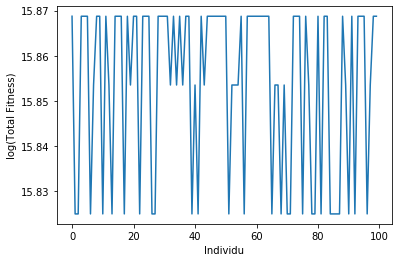

Iterasi ke-50


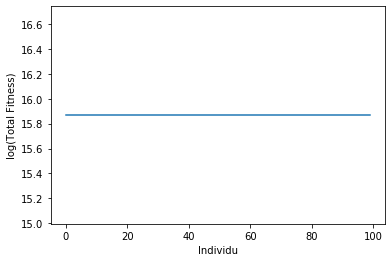

Iterasi ke-75


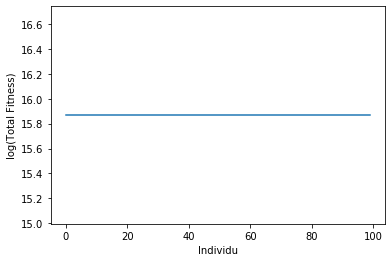

Iterasi ke-100


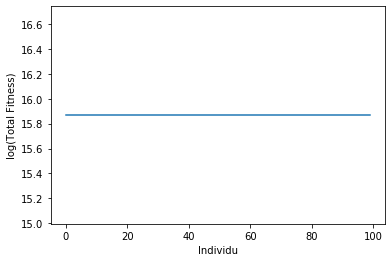

In [61]:
best_gen = []
second_best_gen = []
mean_gen = []
worst_gen = []

best_gen.append([0, populasi[0].fitness])
second_best_gen.append([0, populasi[1].fitness])
mean_gen.append([0, count_mean(populasi)])
worst_gen.append([0, populasi[max_population-1].fitness])

saved_populasi = []

for ppls in range(max_iteration):
    
    list_new_population = [[populasi[i].id_individu, sum([f for f in populasi[i].fitness])] for i in range(len(populasi))]
    
    new_population = []
    
    list_new_population = list_new_population[:jum_seleksi_populasi]
    
    list_new_population.sort(key=lambda l:l[1], reverse=True)
    
#     Proses Elitisme
    
    new_population.append(Individu(0, populasi[list_new_population[0][0]].genotipe, populasi[list_new_population[0][0]].fenotipe, populasi[list_new_population[0][0]].fitness))

    list_new_population.sort(key=lambda l:l[0])
    
#     Memasukkan Probabilitas Roulete Wheel untuk Pemilihan Parent
    
    roulette_wheel = list_new_population
    
    sum_total = sum([r[1] for r in roulette_wheel])
    prob = 0
    for r in roulette_wheel:
        prob+=(r[1]/sum_total)
        r.append(prob)
    
#     Proses Pemilihan Parent, Crossover, dan Mutasi
    
    idx = len(new_population)
    while (idx<max_population):
        r = random.random()
        idx_p1 = 0
        while (roulette_wheel[idx_p1][2]<=r):
            idx_p1+=1
        r = random.random()
        idx_p2 = 0
        while (roulette_wheel[idx_p2][2]<=r):
            idx_p2+=1
        if (idx_p1!=idx_p2):
            parent1 = populasi[idx_p1].genotipe
            parent2 = populasi[idx_p2].genotipe
            child1, child2 = crossover(parent1, parent2)
            child1 = mutasi(child1)
            child2 = mutasi(child2)
            if (len(new_population)<max_population):
                temp_dec_kromosom = decode(parent1)
                temp_fitness = count_fitness(temp_dec_kromosom)
                if (check_constraint(temp_dec_kromosom)):
                    new_population.append(Individu(idx, parent1, temp_dec_kromosom, temp_fitness))
                    idx+=1
            if (len(new_population)<max_population):
                temp_dec_kromosom = decode(parent2)
                temp_fitness = count_fitness(temp_dec_kromosom)
                if (check_constraint(temp_dec_kromosom)):
                    new_population.append(Individu(idx, parent2, temp_dec_kromosom, temp_fitness))
                    idx+=1
    populasi = new_population
    if ((ppls+1)==int(max_iteration*0.25) or (ppls+1)==int(max_iteration*0.5) or (ppls+1)==int(max_iteration*0.75) or (ppls+1)==max_iteration):
        print("Iterasi ke-{}".format(ppls+1))
        plot_fitness_individu(populasi)
    tot_fitness = [[i, sum([f for f in populasi[i].fitness])] for i in range(len(populasi))]
    tot_fitness.sort(key=lambda l:l[1], reverse=True)
    best_gen.append([ppls+1, populasi[tot_fitness[0][0]].fitness])
    second_best_gen.append([ppls+1, populasi[tot_fitness[1][0]].fitness])
    mean_gen.append([ppls+1, count_mean(populasi)])
    worst_gen.append([ppls+1, populasi[tot_fitness[max_population-1][0]].fitness])


### Grafik dan Tabel

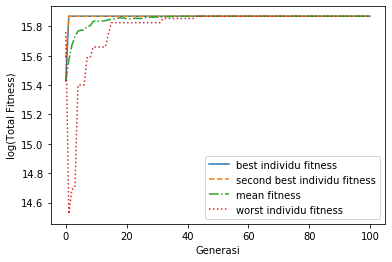

In [62]:
grafik_fitness(best_gen, second_best_gen, mean_gen, worst_gen)

In [63]:
for i in range(len(populasi[0].fenotipe)):
    print("Komoditas ke-{}".format(i+1))
    temp = []
    for j in range(len(populasi[0].fenotipe[i])):
        temp.append([j+1, populasi[0].fenotipe[i][j]])
    print(tabulate(temp, headers=['No', 'Nilai Optimal']))
    print("Total: {}".format(sum([f for f in populasi[0].fenotipe[i]])))

Komoditas ke-1
  No    Nilai Optimal
----  ---------------
   1       679.379
   2         6.16408
   3         5.22818
   4       248.561
   5        71.2726
   6       205.857
   7         5.00305
   8      4419.27
   9       114.849
  10         4.95178
  11        42.8586
  12       420.175
  13        21.76
  14        62.1719
  15       199.48
  16        33.1388
  17       181.278
  18       195.436
  19        11.7324
  20        15.3696
  21         7.33781
  22        33.4172
  23         0.822366
  24         0
  25         0
  26         0
  27         9.53632
Total: 6995.050787449641
Komoditas ke-2
  No    Nilai Optimal
----  ---------------
   1      1400.95
   2         8.17043
   3        14.3775
   4       400.505
   5       178.807
   6       453.38
   7       159.597
   8      7992.72
   9       264.455
  10         0.928458
  11        24.1695
  12       630.591
  13        11.4844
  14        59.1876
  15       295.614
  16        47.4228
  17       280.355
  18   

### Visualisasi ke Peta

In [64]:
import numpy as np
import pandas as pd
import shapefile as shp
import seaborn as sns
from matplotlib import pyplot as mplt
from matplotlib.patches import Patch

In [65]:
shp_path = './resource/PROVINSI_JAWA_BARAT.shp'
sf = shp.Reader(shp_path)

In [66]:
sf.records()[1]

Record #1: ['32', '02', 'JAWA BARAT', 'SUKABUMI']

In [67]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [68]:
df = read_shapefile(sf)

In [69]:
def plot_map(kabkota, warna, title, legend):
    global df
    global sf
    mplt.figure(figsize=(20, 18))
    mplt.legend(handles=legend, loc='right')
    mplt.title(title, fontsize=20)
    for i in range(len(kabkota)):
        com_id = df[df.KABKOT==kabkota[i]].index.to_numpy()[0]
        shape_ex = sf.shape(com_id)
        x = [i[0] for i in shape_ex.points[:]]
        y = [i[1] for i in shape_ex.points[:]]
        mplt.plot(x, y, 'k')
        length = len(x)
        x0 = np.mean(x)
        y0 = np.mean(y)
        mplt.text(x0, y0, kabkota[i], fontsize=15)
        mplt.fill(x, y, color=warna[i])

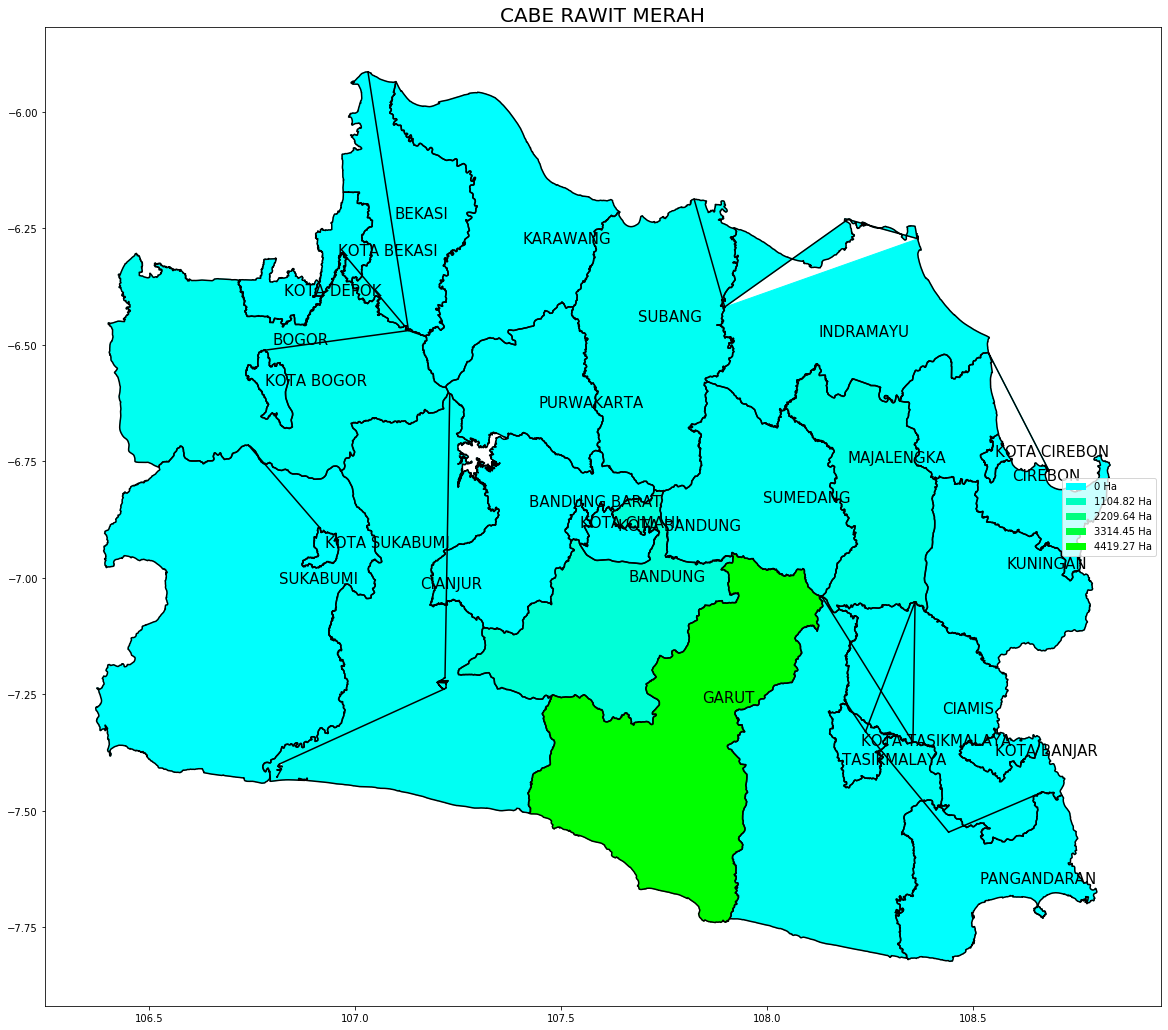

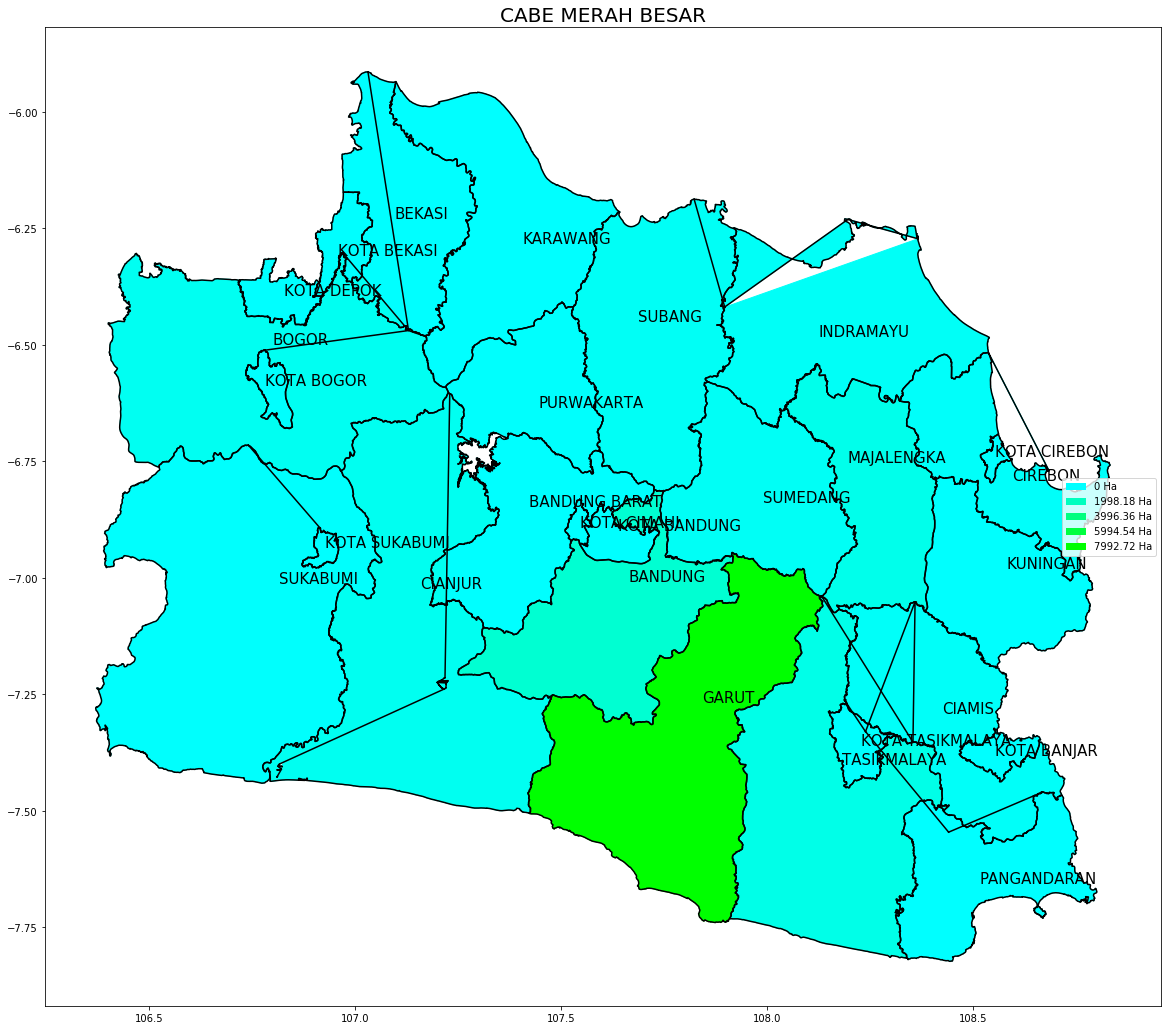

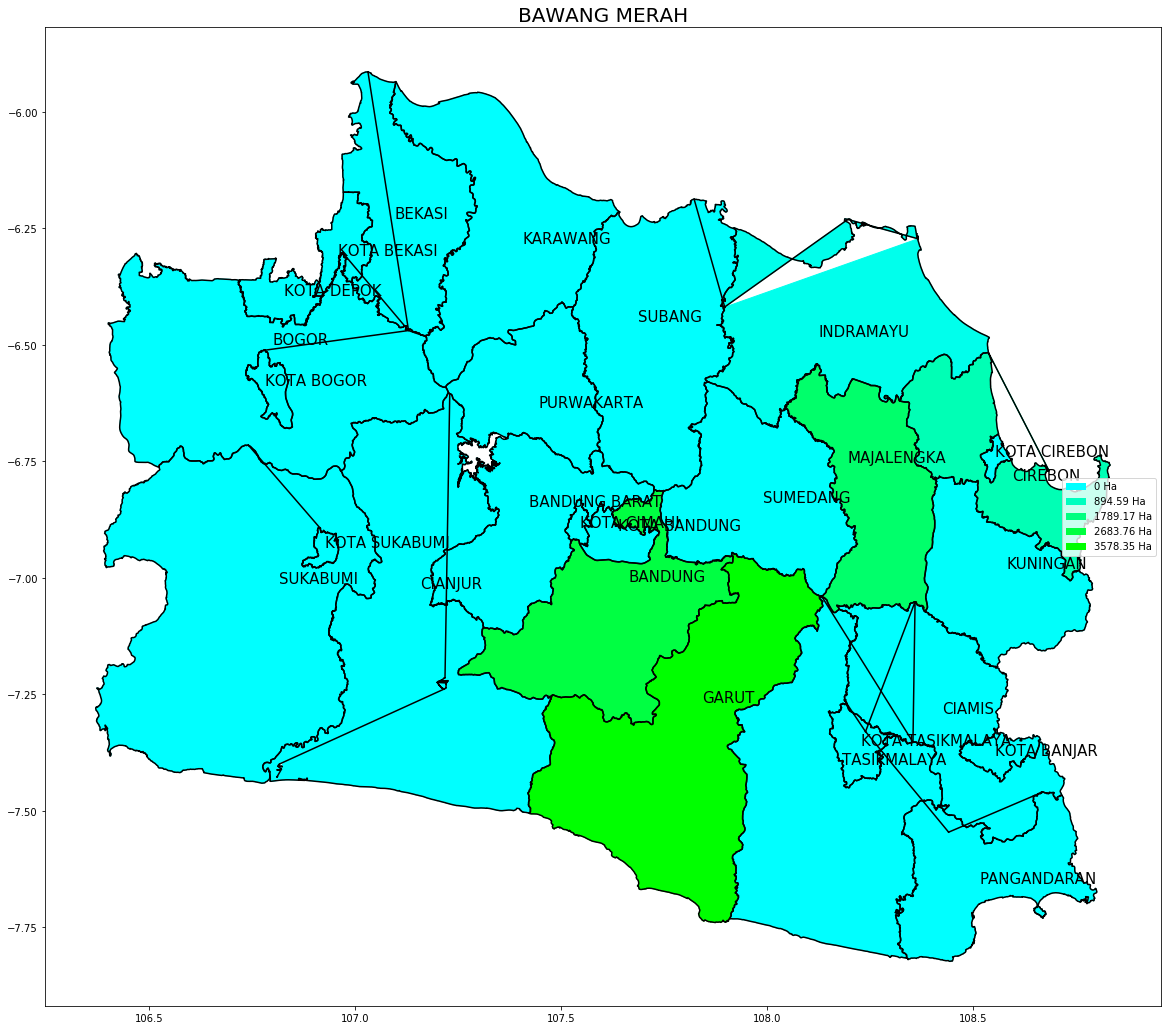

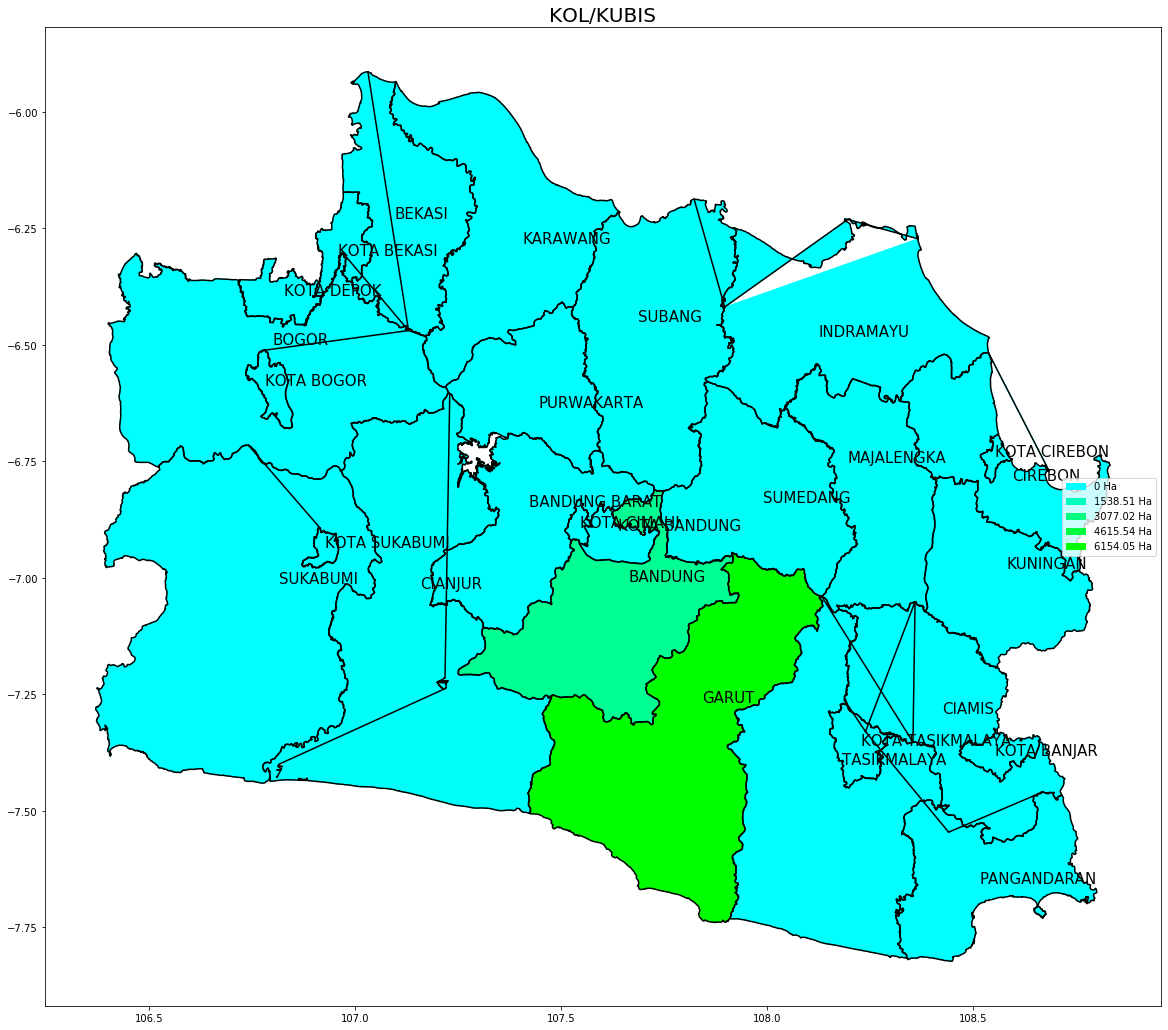

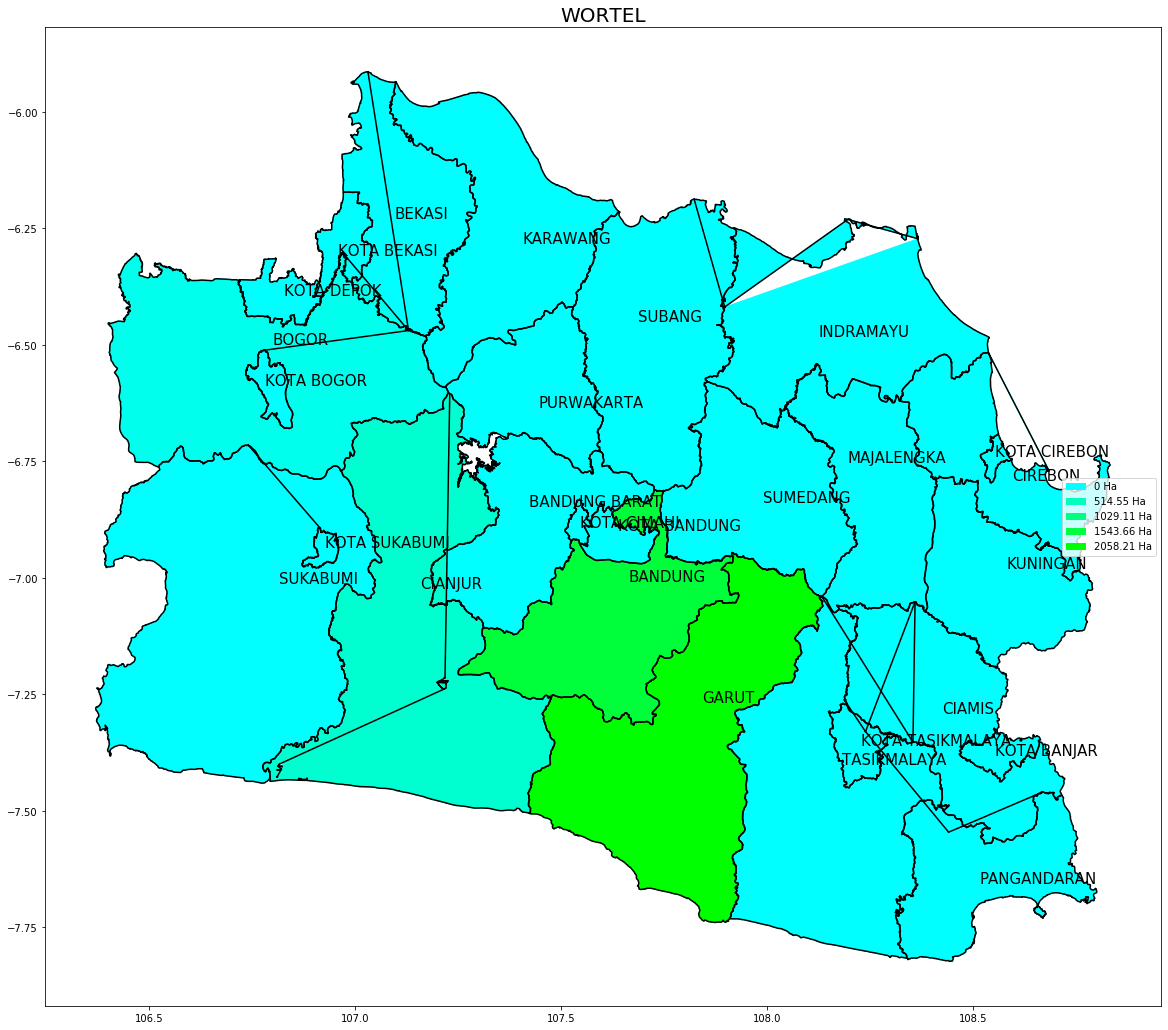

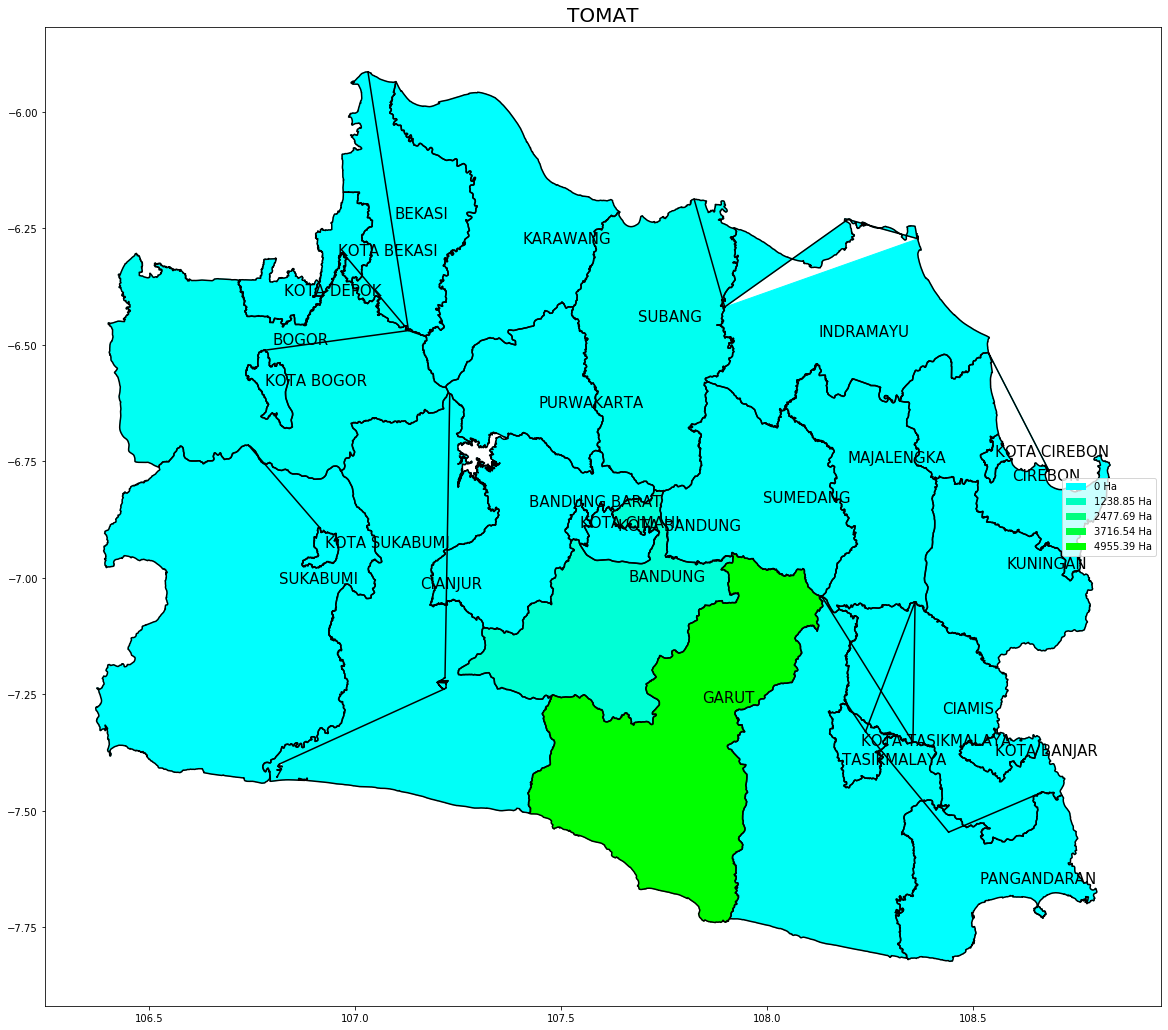

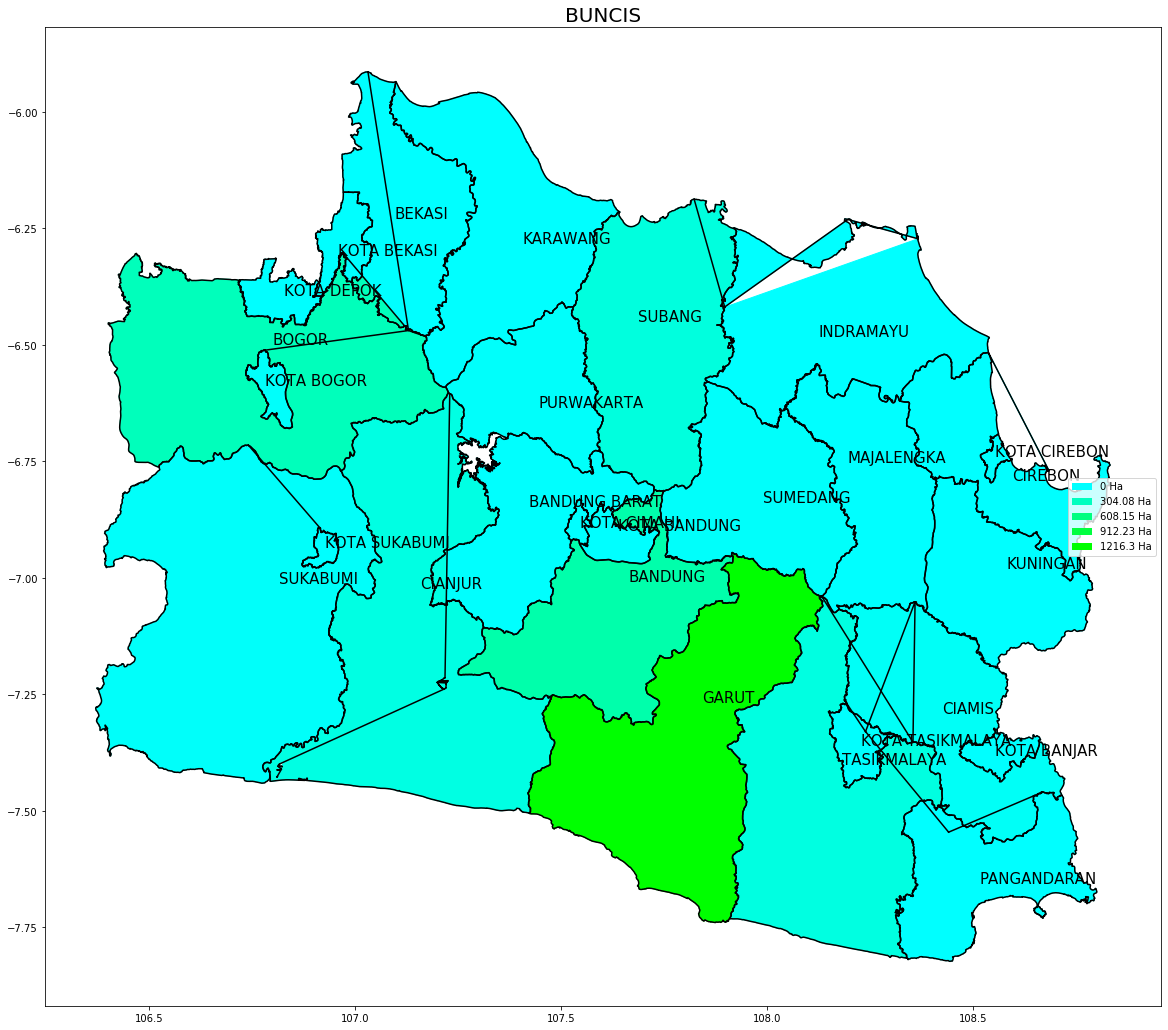

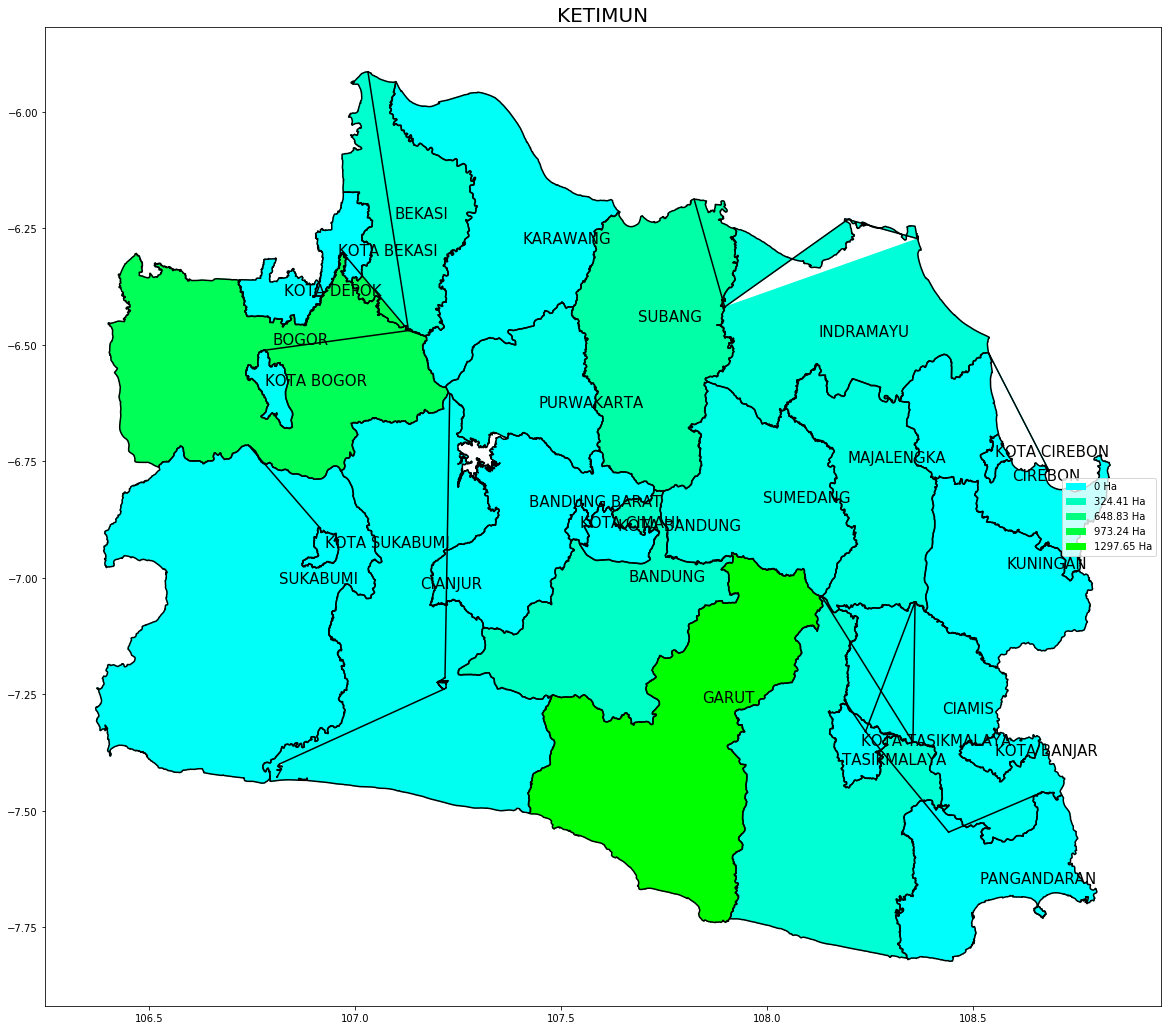

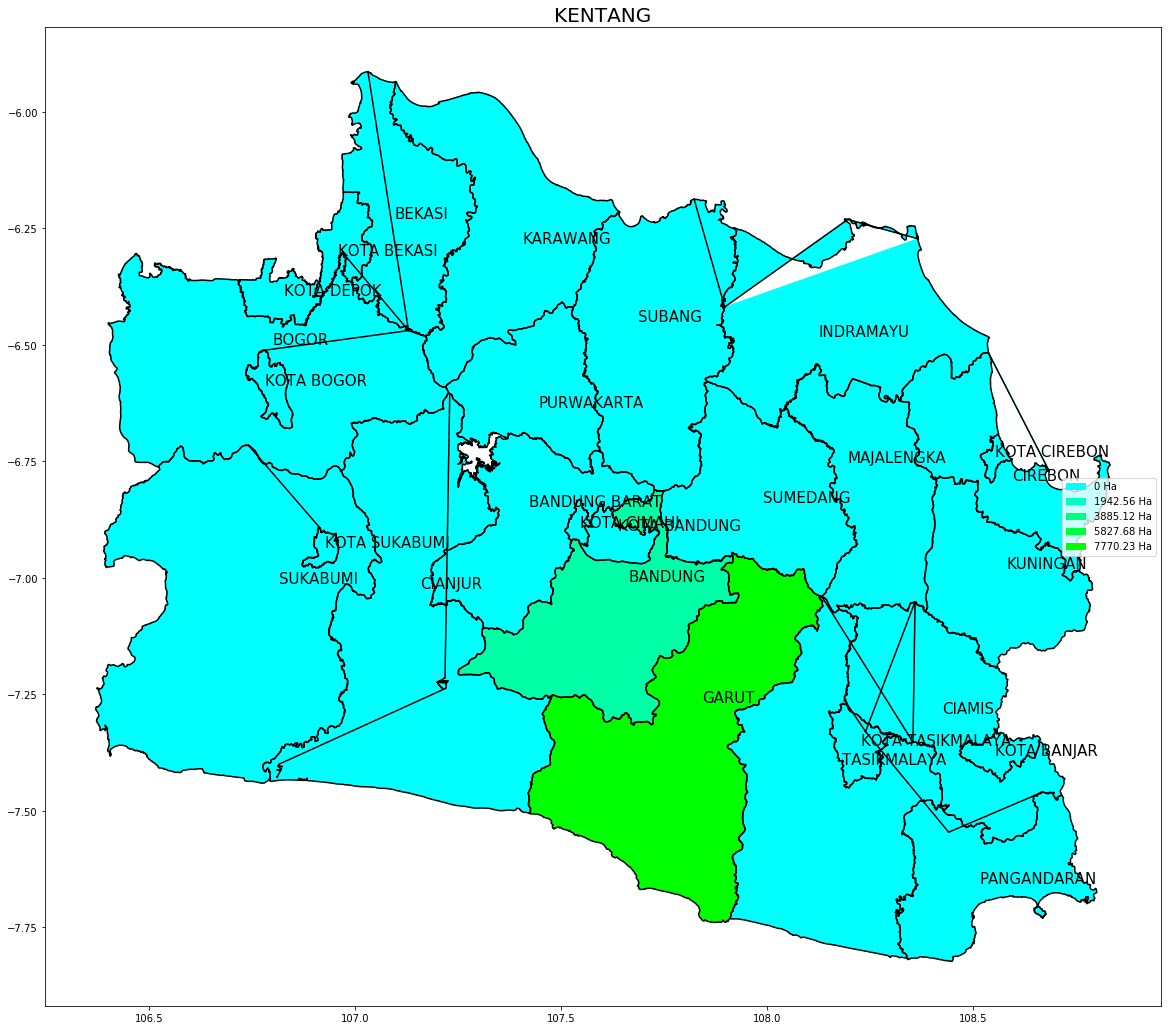

In [70]:
kabkota = ['BANDUNG', 'BANDUNG BARAT', 'BEKASI', 'BOGOR', 'CIAMIS', 'CIANJUR', 'CIREBON', 'GARUT', 'INDRAMAYU', 'KARAWANG', 'KUNINGAN', 'MAJALENGKA', 'PANGANDARAN', 'PURWAKARTA', 'SUBANG', 'SUKABUMI', 'SUMEDANG', 'TASIKMALAYA', 'KOTA BANDUNG', 'KOTA BANJAR', 'KOTA BEKASI', 'KOTA BOGOR', 'KOTA CIMAHI', 'KOTA CIREBON', 'KOTA DEPOK', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA']
komoditas_label = ['CABE RAWIT MERAH', 'CABE MERAH BESAR' ,'BAWANG MERAH', 'KOL/KUBIS', 'WORTEL', 'TOMAT', 'BUNCIS', 'KETIMUN', 'KENTANG']
# legend = [Patch(facecolor=(0, 1, 1), label='0%'), Patch(facecolor=(0, 1, 0.75), label='25%'), Patch(facecolor=(0, 1, 0.5), label='50%'), Patch(facecolor=(0, 1, 0.25), label='75%'), Patch(facecolor=(0, 1, 0), label='100%')]

for i in range(len(komoditas_label)):
    maks_luas = max(populasi[0].fenotipe[i])
    legend = [Patch(facecolor=(0, 1, 1), label='0 Ha'), Patch(facecolor=(0, 1, 0.75), label="{} Ha".format(round(0.25*maks_luas, 2))), Patch(facecolor=(0, 1, 0.5), label="{} Ha".format(round(0.5*maks_luas, 2))), Patch(facecolor=(0, 1, 0.25), label="{} Ha".format(round(0.75*maks_luas, 2))), Patch(facecolor=(0, 1, 0), label="{} Ha".format(round(maks_luas, 2)))]
    warna = [(0, 1, 1-(f/maks_luas)) for f in populasi[0].fenotipe[i]]
    plot_map(kabkota, warna, komoditas_label[i], legend)

### Kode untuk penjelasan tiap step, tanpa iterasi

In [29]:
populasi = []
i = 0
while (len(populasi)<max_population):
    temp_genotipe = encode(genotipe_length)
    temp_dec_kromosom = decode(temp_genotipe)
    temp_fitness = count_fitness(temp_dec_kromosom)
    if (check_constraint(temp_dec_kromosom)):
        populasi.append(Individu(i, temp_genotipe, temp_dec_kromosom, temp_fitness))
        i+=1
# for i in range(0, max_population):
#     temp_genotipe = encode(genotipe_length)
#     temp_dec_kromosom = decode(temp_genotipe)
#     temp_fitness = count_fitness(temp_dec_kromosom)
#     populasi.append(Individu(i, temp_genotipe, temp_dec_kromosom, temp_fitness))
for i in range(len(populasi)):
    print("id populasi: {}".format(populasi[i].id_individu))
    print("genotipe: {}".format(populasi[i].genotipe))
    print("decode genotipe: {}".format(populasi[i].fenotipe))
    print("fitness: {}".format(populasi[i].fitness))
    print("===")

id populasi: 0
genotipe: [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [124]:
split_fitness = []
len_fitness = len(populasi[0].fitness)
for i in range(len_fitness):
    split_fitness.append([])
for p in populasi:
    i = 0
    for f in p.fitness:
        split_fitness[i].append([p.id_individu, f])
        i+=1
print(split_fitness)


[[[0, 2756515929132063.5], [1, 5957633926262380.0], [2, 4931275284800637.0], [3, 7370161384911504.0], [4, 1521031284413888.8], [5, 6619331779502857.0], [6, 4842750092590953.0], [7, 3904837122632143.0], [8, 4207477513326984.0], [9, 9651565167354284.0], [10, 2556348365176110.5], [11, 4381313684755316.0], [12, 8485203521260713.0], [13, 5894775437485793.0], [14, 3426655694074999.5], [15, 1.0011241510291824e+16], [16, 1.0080363979786266e+16], [17, 8286635108784207.0], [18, 1697281528261508.2], [19, 6054940719479366.0], [20, 6040277859581426.0], [21, 7546084814517063.0], [22, 2046357389347381.0], [23, 7548778551448970.0], [24, 3706494607903809.5], [25, 6462629304632066.0], [26, 2494346653673651.0], [27, 7193340035539762.0], [28, 3887535546112541.5], [29, 4168415088036428.0], [30, 9638123849097222.0], [31, 6888778708684288.0], [32, 6117431060686510.0], [33, 4986884037187301.0], [34, 6563963888686668.0], [35, 3237810607732935.5], [36, 6573451921086429.0], [37, 2967355184081905.0], [38, 8579467

In [125]:
list_new_population = []
new_population = []
left_count = jum_seleksi_populasi
idx_parento = 0

In [126]:
list_parento = create_list_parento(split_fitness)
print(list_parento)

[[15, 3, 7, 16, 23, 30, 32, 34, 39, 43, 46, 50, 56, 57, 63, 67, 70, 71, 72, 78, 80, 90, 92], [51, 9, 12, 17, 21, 38, 42, 65, 69, 82, 87], [1, 5, 8, 10, 11, 13, 19, 20, 25, 27, 28, 29, 31, 35, 36, 37, 40, 41, 44, 45, 48, 52, 53, 55, 59, 60, 61, 62, 64, 66, 75, 76, 77, 83, 84, 85, 86, 89, 91, 93, 95, 96], [58, 2, 14, 22, 24, 33, 68, 79, 88, 94, 97, 98], [0, 4, 6, 18, 26, 47, 54, 73, 74, 99], [49, 81]]


In [127]:
while (left_count>0):
    obj_temp = crowding_distance(split_fitness, list_parento[idx_parento])
    tot_crowding_distance = [[p, 0] for p in list_parento[idx_parento]]
    for i in range(len(obj_temp)):
        for j in range(len(obj_temp[i])):
            x = 0
            while (tot_crowding_distance[x][0]!=obj_temp[i][j][0]):
                x+=1
            tot_crowding_distance[x][1]+=obj_temp[i][j][2]
    for t in tot_crowding_distance:
        total_fitness = 0
        for f in populasi[t[0]].fitness:
            total_fitness+=f
        t.append(total_fitness)
    tot_crowding_distance.sort(key=lambda l:[l[1], l[2]], reverse=True)
    print(tot_crowding_distance)
    sys.exit()
    for t in tot_crowding_distance:
        if (left_count>0):
            list_new_population.append(t[0])
            left_count-=1
    idx_parento+=1
print(list_new_population)

[[56, inf, 8.274719458144995e+16], [67, inf, 8.207507583640171e+16], [15, inf, 8.023436284902502e+16], [80, inf, 7.918447389439878e+16], [46, inf, 7.443382352224341e+16], [3, inf, 5.9668365683208e+16], [57, inf, 5.950614114192931e+16], [39, inf, 4.318521756513788e+16], [7, inf, 3.881511763474224e+16], [92, inf, 3.259117955554164e+16], [34, 180637295054033.25, 5.384914637536507e+16], [32, 159888830075946.78, 5.2218548730302616e+16], [71, 125657529512231.83, 6.921061433408244e+16], [23, 117825987897608.58, 6.262730091533127e+16], [63, 115834231896545.56, 7.383095326079517e+16], [50, 87728283018254.02, 6.535311146066592e+16], [90, 72978196939874.84, 6.806136454879836e+16], [78, 54663816216375.69, 7.475355384836843e+16], [16, 54420640706397.0, 7.643807919660773e+16], [72, 52027479860039.85, 7.096772459885635e+16], [70, 39853635312756.85, 7.735654786169635e+16], [43, 34584349650841.38, 7.801895246093693e+16], [30, 29253118598956.82, 7.64199896817848e+16]]


SystemExit: 

In [111]:
len(list_new_population)

60

In [112]:
for i in range(len(list_new_population)):
    new_population.append(Individu(i, populasi[list_new_population[i]].genotipe, populasi[list_new_population[i]].fenotipe, populasi[list_new_population[i]].fitness))

In [114]:
idx = len(new_population)
while (idx<max_population):
    idx_p1 = random.choice(list_new_population)
    idx_p2 = random.choice(list_new_population)
    if (idx_p1!=idx_p2):
        parent1 = populasi[idx_p1].genotipe
        parent2 = populasi[idx_p1].genotipe
        child1, child2 = crossover(parent1, parent2)
        if (len(new_population)<max_population):
            temp_fenotipe = decode(parent1)
            temp_fitness = count_fitness(temp_fenotipe)
            new_population.append(Individu(idx, parent1, temp_fenotipe, temp_fitness))
            idx+=1
        if (len(new_population)<max_population):
            temp_fenotipe = decode(parent2)
            temp_fitness = count_fitness(temp_fenotipe)
            new_population.append(Individu(idx, parent2, temp_fenotipe, temp_fitness))
            idx+=1

In [115]:
for i in range(len(new_population)):
    print("id populasi: {}".format(new_population[i].id_individu))
    print("genotipe: {}".format(new_population[i].genotipe))
    print("decode genotipe: {}".format(new_population[i].fenotipe))
    print("fitness: {}".format(new_population[i].fitness))
    print("===")

id populasi: 0
genotipe: [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [116]:
populasi = new_population

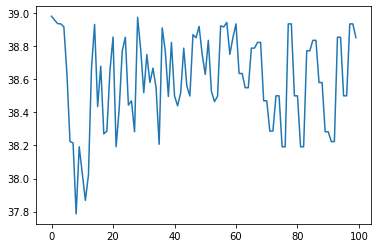

In [117]:
x = []
y = []
for p in populasi:
    x.append(p.id_individu)
    y.append(math.log(sum([f for f in p.fitness])))
#     print("ID: {}, Fitness: {}".format(p.id_individu, p.fitness))
plt.plot(x, y)
plt.show()

In [51]:
for i in range(len(new_population)):
    print("id populasi: {}".format(populasi[i].id_individu))
    print("genotipe: {}".format(populasi[i].genotipe))
    print("decode genotipe: {}".format(populasi[i].fenotipe))
    print("fitness: {}".format(populasi[i].fitness))
    print("===")

id populasi: 0
genotipe: [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,